In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd.set_option('display.max_columns', None)
sns.set_theme()

os.makedirs('../outputs/charts', exist_ok=True)

In [2]:
df = pd.read_csv('../data/nhsbsa_commercial_pipeline_2025_2026_q2.csv')

df.head()

,REFERENCE_NUMBER,CONTRACT_TITLE,SHORT_DESCRIPTION,PROCUREMENT_PROCESS,COMMERCIAL_STRATEGY,PLANNED_PROCUREMENT_SOURCING_ROUTE,ESTIMATED_CONTRACT_LENGTH,VALUE_BAND,ESTIMATED_COMMERCIAL_ACTIVITY_START_DATE,ESTIMATED_PROCUREMENT_START_DATE,ESTIMATED_CONTRACT_COMMENCEMENT_DATE,PRIMARY_CPV_CATEGORY,PRIMARY_CPV_CODE,EXISTING_CONTRACT_NAME,EXISTING_CONTRACT_END_DATE,MAXIMUM_CONTRACT_END_DATE,EXISTING_CONTRACT_CF_AWARD_NOTICE
0,W114008,Self Service Data Quality,Reprocurement of Self Service data Quality (Da...,Procurement,2. Re-procurement (same scope),PCR Framework - Further Competition,24,C,2025-09-01,2025-10-01,2026-04-01,Software package and information systems,48000000,Self Service Data Quality Tool (Data Profiling...,2026-03-31,2026-03-31,https://www.contractsfinder.service.gov.uk/Not...
1,W116683,ISAE 3000/3402 Reports,Provision of ISAE3000 & 3402 audit reports,Pipeline,2. Re-procurement (same scope),PCR Framework - Further Competition,48,D,2026-08-03,2026-11-01,2027-11-13,Financial auditing services,79212100,ISAE 3000/3402 Reports,2027-11-12,2027-11-12,https://www.contractsfinder.service.gov.uk/Not...
2,W118138,Facilities Management Services,Facilities Management Services,Pre-Procurement,2. Re-procurement (same scope),PCR Framework - Further Competition,60,H,2025-01-01,2025-11-01,2027-04-01,Facilities management services,79993100,Facilities Management Services,2027-03-31,2031-03-31,https://www.contractsfinder.service.gov.uk/not...
3,W118139,Travel Management Services,Travel Management Services,Pipeline,2. Re-procurement (same scope),PCR Framework - Further Competition,48,E,2025-10-01,2025-11-01,2026-12-01,Travel management services,63516000,Travel Management Services,2026-11-30,2026-11-30,https://www.contractsfinder.service.gov.uk/Not...
4,W122477,Digital Accessibility Services,Contract to review and provide recommendations...,Procurement,2. Re-procurement (same scope),PCR Framework - Further Competition,48,C,2025-09-30,2025-09-30,2026-01-21,System quality assurance assessment and review...,72225000,Digital Accessibility Services,2026-01-21,2026-01-21,https://www.contractsfinder.service.gov.uk/Not...


In [3]:
df.shape

(108, 17)

In [4]:
df.columns

Index(['REFERENCE_NUMBER', 'CONTRACT_TITLE', 'SHORT_DESCRIPTION',
       'PROCUREMENT_PROCESS', 'COMMERCIAL_STRATEGY',
       'PLANNED_PROCUREMENT_SOURCING_ROUTE', 'ESTIMATED_CONTRACT_LENGTH',
       'VALUE_BAND', 'ESTIMATED_COMMERCIAL_ACTIVITY_START_DATE',
       'ESTIMATED_PROCUREMENT_START_DATE',
       'ESTIMATED_CONTRACT_COMMENCEMENT_DATE', 'PRIMARY_CPV_CATEGORY',
       'PRIMARY_CPV_CODE', 'EXISTING_CONTRACT_NAME',
       'EXISTING_CONTRACT_END_DATE', 'MAXIMUM_CONTRACT_END_DATE',
       'EXISTING_CONTRACT_CF_AWARD_NOTICE'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 17 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   REFERENCE_NUMBER                          108 non-null    object
 1   CONTRACT_TITLE                            108 non-null    object
 2   SHORT_DESCRIPTION                         108 non-null    object
 3   PROCUREMENT_PROCESS                       108 non-null    object
 4   COMMERCIAL_STRATEGY                       108 non-null    object
 5   PLANNED_PROCUREMENT_SOURCING_ROUTE        103 non-null    object
 6   ESTIMATED_CONTRACT_LENGTH                 108 non-null    int64 
 7   VALUE_BAND                                108 non-null    object
 8   ESTIMATED_COMMERCIAL_ACTIVITY_START_DATE  108 non-null    object
 9   ESTIMATED_PROCUREMENT_START_DATE          108 non-null    object
 10  ESTIMATED_CONTRACT_COMMENCEMENT_DATE      108 non-

In [6]:
df.describe()

,ESTIMATED_CONTRACT_LENGTH,PRIMARY_CPV_CODE
count,108.000000,1.080000e+02
mean,37.777778,6.380070e+07
std,17.215692,1.573931e+07
min,4.000000,3.016310e+07
25%,24.000000,4.816350e+07
50%,36.000000,7.200000e+07
75%,48.000000,7.301750e+07
max,96.000000,9.071400e+07


In [7]:
df.isnull().sum().sort_values(ascending=False)

MAXIMUM_CONTRACT_END_DATE                   14
EXISTING_CONTRACT_END_DATE                  14
PLANNED_PROCUREMENT_SOURCING_ROUTE           5
REFERENCE_NUMBER                             0
ESTIMATED_PROCUREMENT_START_DATE             0
EXISTING_CONTRACT_NAME                       0
PRIMARY_CPV_CODE                             0
PRIMARY_CPV_CATEGORY                         0
ESTIMATED_CONTRACT_COMMENCEMENT_DATE         0
ESTIMATED_COMMERCIAL_ACTIVITY_START_DATE     0
CONTRACT_TITLE                               0
VALUE_BAND                                   0
ESTIMATED_CONTRACT_LENGTH                    0
COMMERCIAL_STRATEGY                          0
PROCUREMENT_PROCESS                          0
SHORT_DESCRIPTION                            0
EXISTING_CONTRACT_CF_AWARD_NOTICE            0
dtype: int64

In [8]:
df = df.drop_duplicates()

In [9]:
date_cols = [col for col in df.columns if "DATE" in col.upper()]

for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

df[date_cols].head()

,ESTIMATED_COMMERCIAL_ACTIVITY_START_DATE,ESTIMATED_PROCUREMENT_START_DATE,ESTIMATED_CONTRACT_COMMENCEMENT_DATE,EXISTING_CONTRACT_END_DATE,MAXIMUM_CONTRACT_END_DATE
0,2025-09-01,2025-10-01,2026-04-01,2026-03-31,2026-03-31
1,2026-08-03,2026-11-01,2027-11-13,2027-11-12,2027-11-12
2,2025-01-01,2025-11-01,2027-04-01,2027-03-31,2031-03-31
3,2025-10-01,2025-11-01,2026-12-01,2026-11-30,2026-11-30
4,2025-09-30,2025-09-30,2026-01-21,2026-01-21,2026-01-21


In [10]:
text_cols = df.select_dtypes(include='object').columns

for col in text_cols:
    df[col] = df[col].str.strip()

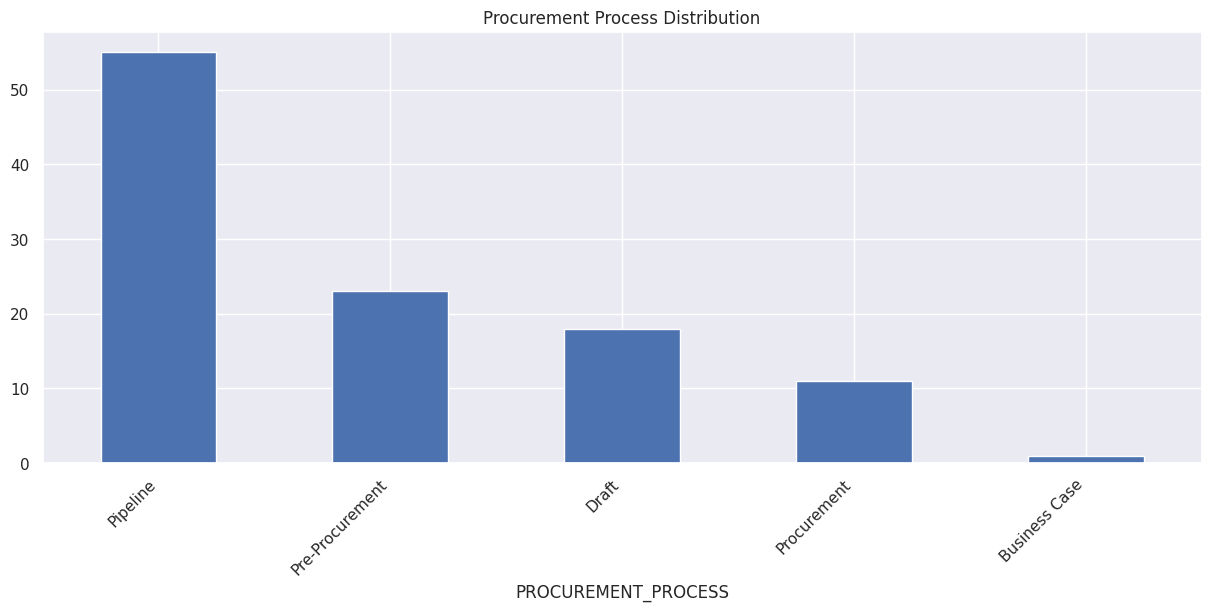

In [11]:
plt.figure(figsize=(12,6), constrained_layout=True)
df['PROCUREMENT_PROCESS'].value_counts().plot(kind='bar')

plt.title("Procurement Process Distribution")
plt.xticks(rotation=45, ha='right')

plt.savefig('../outputs/charts/procurement_process.png', bbox_inches='tight')
plt.show()

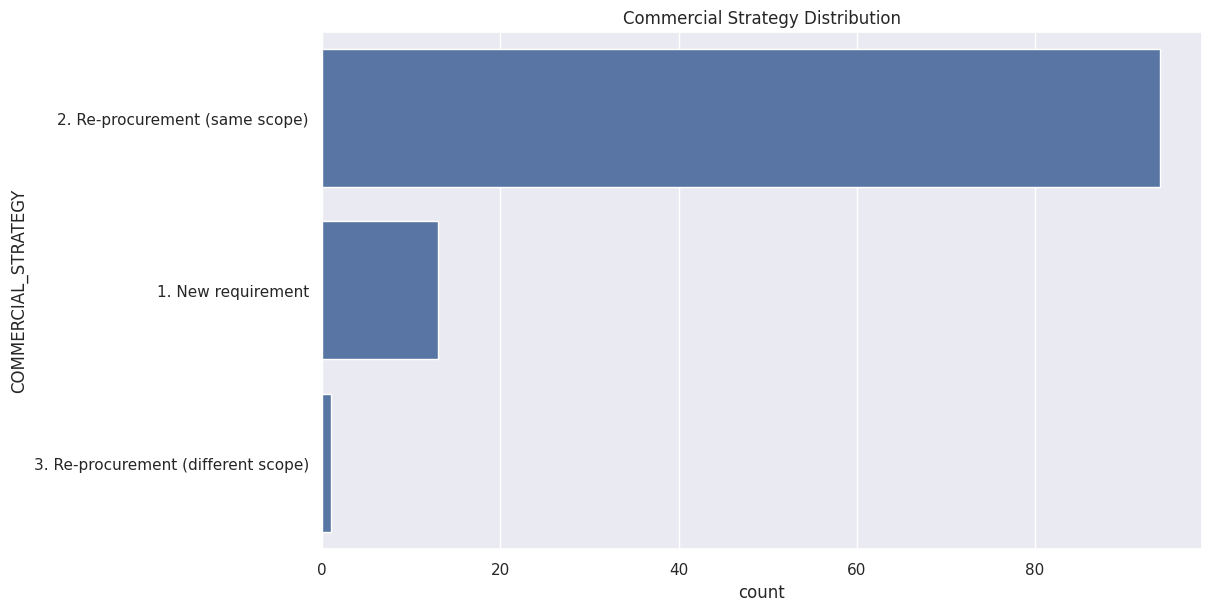

In [12]:
plt.figure(figsize=(12,6), constrained_layout=True)

sns.countplot(
    y=df['COMMERCIAL_STRATEGY'],
    order=df['COMMERCIAL_STRATEGY'].value_counts().index
)

plt.title("Commercial Strategy Distribution")
plt.savefig('../outputs/charts/commercial_strategy.png', bbox_inches='tight')
plt.show()

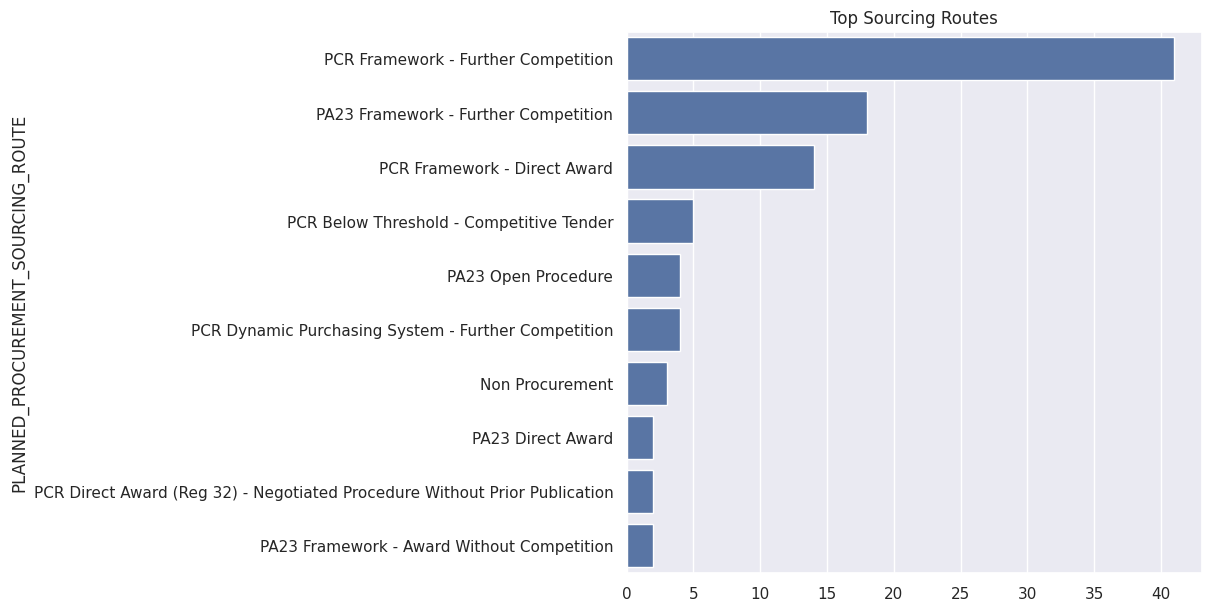

In [13]:
plt.figure(figsize=(12,6), constrained_layout=True)

top_routes = df['PLANNED_PROCUREMENT_SOURCING_ROUTE'].value_counts().head(10)

sns.barplot(x=top_routes.values, y=top_routes.index)

plt.title("Top Sourcing Routes")
plt.savefig('../outputs/charts/sourcing_routes.png', bbox_inches='tight')

plt.show()

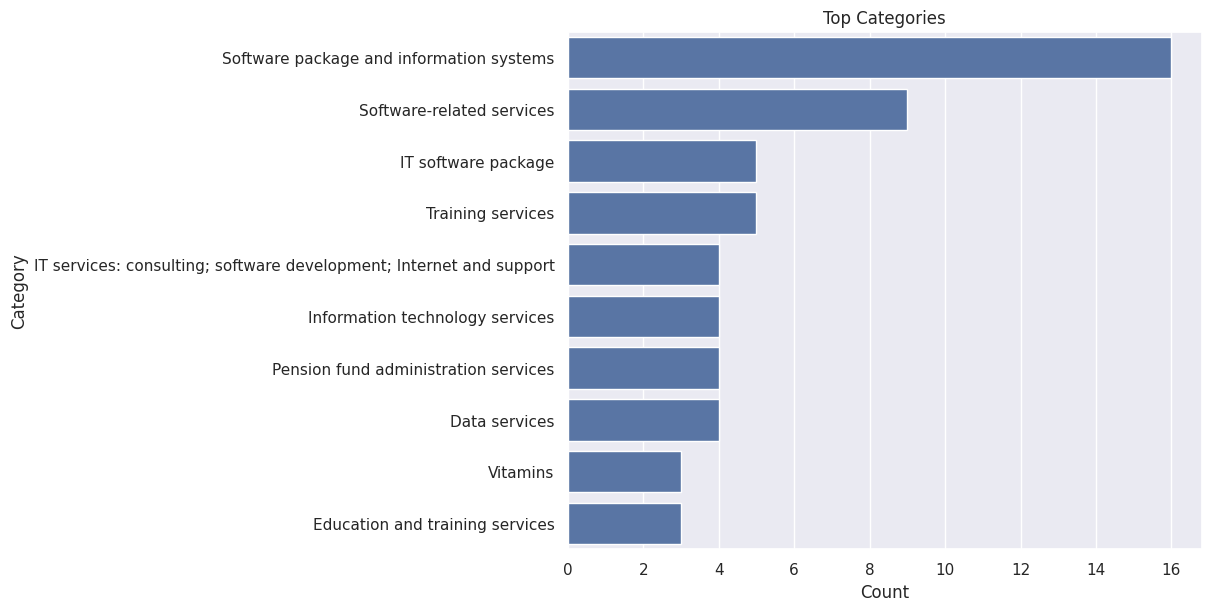

In [14]:
plt.figure(figsize=(12,6), constrained_layout=True)

top_cat = df['PRIMARY_CPV_CATEGORY'].value_counts().head(10)
sns.barplot(x=top_cat.values, y=top_cat.index)

plt.title("Top Categories")
plt.xlabel("Count")
plt.ylabel("Category")

plt.savefig('../outputs/charts/categories.png', bbox_inches='tight')
plt.show()

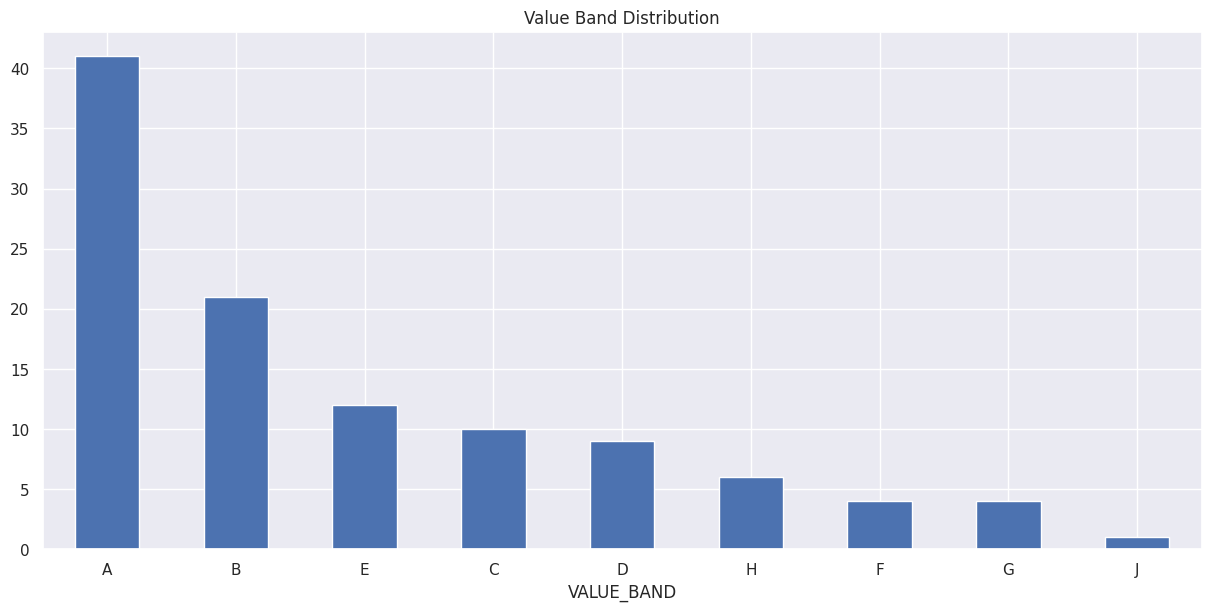

In [15]:
plt.figure(figsize=(12,6), constrained_layout=True)

df['VALUE_BAND'].value_counts().plot(kind='bar')
plt.title("Value Band Distribution")
plt.xticks(rotation=0)

plt.savefig('../outputs/charts/value_band.png', bbox_inches='tight')
plt.show()

In [17]:
df['month'] = df['ESTIMATED_COMMERCIAL_ACTIVITY_START_DATE'].dt.to_period('M')

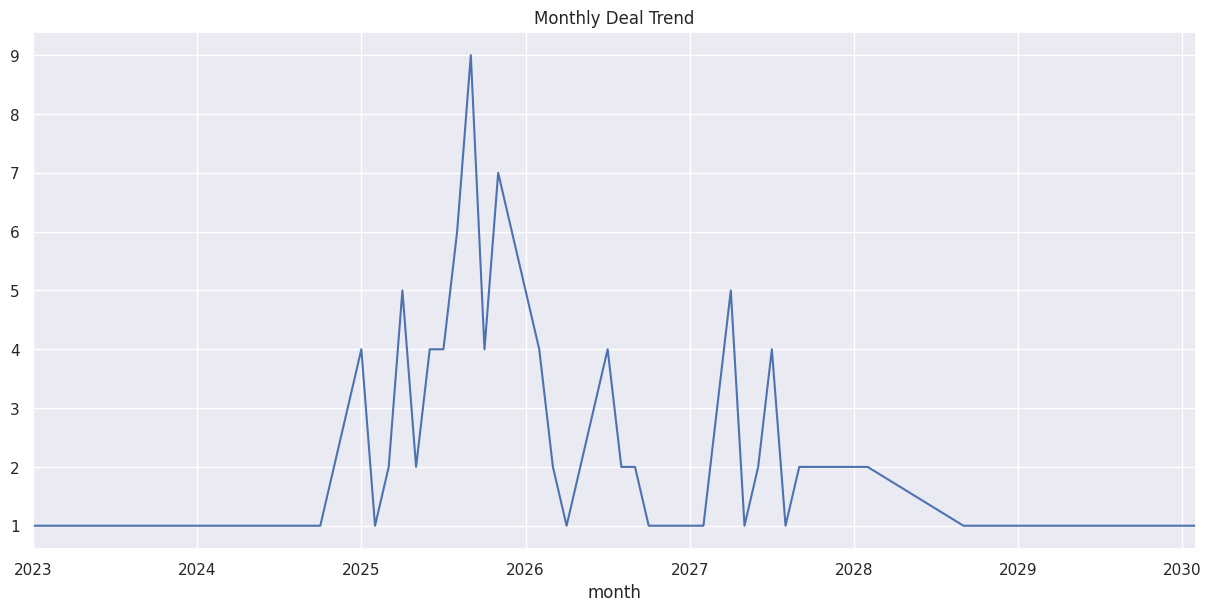

In [18]:
plt.figure(figsize=(12,6), constrained_layout=True)
df.groupby('month').size().sort_index().plot()

plt.title("Monthly Deal Trend")
plt.savefig('../outputs/charts/monthly_trend.png', bbox_inches='tight')
plt.show()

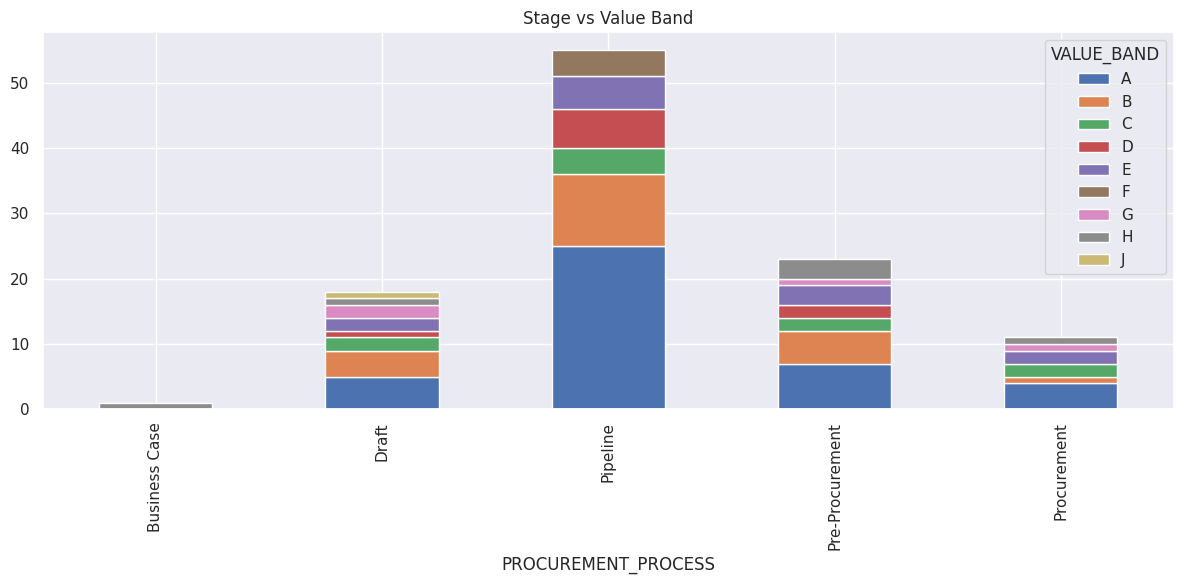

In [19]:
cross = pd.crosstab(df['PROCUREMENT_PROCESS'], df['VALUE_BAND'])

ax = cross.plot(kind='bar', stacked=True, figsize=(12,6))
ax.set_title("Stage vs Value Band")
plt.tight_layout()

plt.savefig('../outputs/charts/stage_vs_value.png', bbox_inches='tight')
plt.show()